In [1]:
import glob
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import marsilea as ma
import marsilea.plotter as mp
import scienceplots
# %matplotlib widget
import pickle
plt.style.use(['science', 'nature'])
import numpy as np


In [2]:
tool_map = {
    "scapa": "scAPA",
    "scapatrap": "scAPAtrap",
    "sierra": "Sierra",
    "maaper": "MAAPER",
    "scapture": "SCAPTURE",
    "scape": "SCAPE",
    "infernape": "Infernape",
}

protocol_map = {
    "Visium": "10X Visium",
    "VisiumHD": "10X Visium HD",
    "Chromium": "10X Chromium",
    "Dropseq": "Drop-seq",
    "Stereoseq": "Stereo-seq",
    "Slideseq": "Slide-seq V2",
    "SpatialTranscriptomics": "ST",
    "Microwell": "Microwell-seq",
}

protocol_order = ["10X Chromium", "Drop-seq", "Microwell-seq", "10X Visium","Stereo-seq", "Slide-seq V2", "ST"]
tool_order = ["SCAPE", "scAPAtrap", "Infernape", "SCAPTURE", "scAPA",  "Sierra"]

color = [
    "#386b98",
    "#269a51",
    "#edaa4d",
    "#d34123",
    "#7e648a",
    "#454545",
    "#929292",
]

palette=sns.color_palette(color, 7)
mm = 1/25.4

plt.rcParams['xtick.labelsize'] = 5
plt.rcParams['ytick.labelsize'] = 5
plt.rcParams['axes.labelsize'] = 5
plt.rcParams["xtick.top"] = False
plt.rcParams["ytick.right"] = False
plt.rcParams["lines.linewidth"] = 0.5
plt.rcParams["legend.fontsize"] = 5
plt.rcParams["legend.title_fontsize"] = 6
plt.rcParams['hatch.linewidth'] = 0.5

In [3]:
match_performance_df = pd.read_csv('/root/apabenchmark/data/performance/match_performance.tsv', sep='\t')
match_performance_df["tool"] = match_performance_df["tool"].map(tool_map)
match_performance_df["protocol"] = match_performance_df["protocol"].map(protocol_map)
match_performance_df["protocol"] = pd.Categorical(match_performance_df["protocol"], protocol_order)
match_performance_df["tool"] = pd.Categorical(match_performance_df["tool"], tool_order)

match_performance_df["pas"] = match_performance_df["sample"].str.split("_", expand=True).iloc[:,4]
match_performance_df["f1_rank"] = match_performance_df.groupby(["tool","pas","match_type"])["f1"].rank(ascending=False)
match_performance_df["recall_rank"] = match_performance_df.groupby(["tool","pas","match_type"])["recall"].rank(ascending=False)
match_performance_df["precision_rank"] = match_performance_df.groupby(["tool","pas","match_type"])["precision"].rank(ascending=False)
match_performance_rank_df = match_performance_df.groupby(["tool","protocol","match_type"]).mean().reset_index()

/tmp/ipykernel_850126/1435648685.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  match_performance_rank_df = match_performance_df.groupby(["tool","protocol","match_type"]).mean().reset_index()


In [4]:
pas_match_performance_f1_rank_df = match_performance_rank_df[match_performance_rank_df["match_type"] == "pas"].pivot(index="tool", columns="protocol", values="f1_rank")
te_match_performance_f1_rank_df = match_performance_rank_df[match_performance_rank_df["match_type"] == "te"].pivot(index="tool", columns="protocol", values="f1_rank")

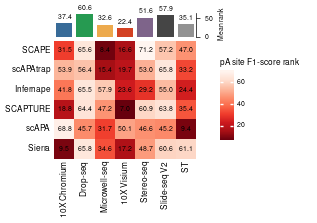

In [5]:
plt.rcParams["xtick.direction"] = "out"
plt.rcParams["ytick.direction"] = "out"
plt.rcParams["xtick.bottom"] = False
plt.rcParams["xtick.minor.bottom"] = True
plt.rcParams["ytick.left"] = False

cmap = ["Reds", "Blues", "Greens"]
h = ma.Heatmap(
    pas_match_performance_f1_rank_df,
    cmap="Reds_r",
    label="pA site F1-score rank",
    width=36*mm,
    height=30*mm,
)
h.add_layer(mp.TextMesh(np.around(pas_match_performance_f1_rank_df.to_numpy(),1), color="black", fontsize=5))
h.add_top(mp.Numbers(
    pas_match_performance_f1_rank_df.mean().round(1),
    color=palette, 
    label="Mean rank",
    show_value=True,
    props={"fontsize": 5}
    ),
    size=6*mm,
    pad=1*mm,
    name="top"
)


# h.add_left(mp.Chunk(["" for i in range(7)], palette, ),pad=0.05)
h.add_left(mp.Labels(tool_order, rotation=0, fontsize=6), size=7*mm, pad=1*mm)
# h.add_bottom(mp.Chunk(["" for i in range(7)], palette),pad=0.05)
h.add_bottom(mp.Labels(protocol_order, rotation=90, fontsize=6), size=10*mm, pad=1*mm)
h.add_legends("right", align_legends="top",pad=2.5*mm)
h.render()

h.get_ax("top").yaxis.set_label_position("right")
h.get_ax("top").yaxis.set_ticks_position("right")
h.get_ax("top").tick_params(axis='y', which='minor', right=False)
h.get_ax("top").spines["right"].set_visible(True)
h.get_ax("top").spines["left"].set_visible(False)

plt.savefig('/root/apabenchmark/plot/fig6/pas_f1_rank.pdf', bbox_inches='tight', dpi=300)
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.bottom"] = True
plt.rcParams["ytick.left"] = True
plt.rcParams["xtick.minor.bottom"] = False

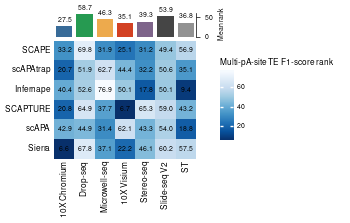

In [6]:
plt.rcParams["xtick.direction"] = "out"
plt.rcParams["ytick.direction"] = "out"
plt.rcParams["xtick.bottom"] = False
plt.rcParams["xtick.minor.bottom"] = True
plt.rcParams["ytick.left"] = False

cmap = ["Reds", "Blues", "Greens"]
h = ma.Heatmap(
    te_match_performance_f1_rank_df,
    cmap="Blues_r",
    label="Multi-pA-site TE F1-score rank",
    width=36*mm,
    height=30*mm,
)
h.add_layer(mp.TextMesh(np.around(te_match_performance_f1_rank_df.to_numpy(),1), color="black", fontsize=5))
h.add_top(mp.Numbers(
    te_match_performance_f1_rank_df.mean().round(1),
    color=palette, 
    label="Mean rank",
    show_value=True,
    props={"fontsize": 5}
    ),
    size=6*mm,
    pad=1*mm,
    name="top"
)


# h.add_left(mp.Chunk(["" for i in range(7)], palette, ),pad=0.05)
h.add_left(mp.Labels(tool_order, rotation=0, fontsize=6), size=7*mm, pad=1*mm)
# h.add_bottom(mp.Chunk(["" for i in range(7)], palette),pad=0.05)
h.add_bottom(mp.Labels(protocol_order, rotation=90, fontsize=6), size=10*mm, pad=1*mm)
h.add_legends("right", align_legends="top",pad=2.5*mm)
h.render()

h.get_ax("top").yaxis.set_label_position("right")
h.get_ax("top").yaxis.set_ticks_position("right")
h.get_ax("top").tick_params(axis='y', which='minor', right=False)
h.get_ax("top").spines["right"].set_visible(True)
h.get_ax("top").spines["left"].set_visible(False)

plt.savefig('/root/apabenchmark/plot/fig6/te_f1_rank.pdf', bbox_inches='tight', dpi=300)
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.bottom"] = True
plt.rcParams["ytick.left"] = True
plt.rcParams["xtick.minor.bottom"] = False

In [7]:
quantification_performance_df = pd.read_csv('/root/apabenchmark/data/performance/pas_quantification_performance.tsv', sep='\t')
# quantification_performance_df = quantification_performance_df.groupby(['tool', 'protocol']).mean(numeric_only=True).reset_index()
quantification_performance_df['protocol'] = quantification_performance_df['protocol'].map(protocol_map)
quantification_performance_df['tool'] = quantification_performance_df['tool'].map(tool_map)
quantification_performance_df['protocol'] = pd.Categorical(quantification_performance_df['protocol'], categories=protocol_order, ordered=True)
quantification_performance_df['tool'] = pd.Categorical(quantification_performance_df['tool'], categories=tool_order, ordered=True)

quantification_performance_df["pas"] = quantification_performance_df["sample"].str.split("_", expand=True).iloc[:,4]
quantification_performance_df["mape_pas_rank"] = quantification_performance_df.groupby(["tool","pas"])["mape_pas"].rank(ascending=True)
quantification_performance_df["mape_pas_ct_rank"] = quantification_performance_df.groupby(["tool","pas"])["mape_pas_ct"].rank(ascending=True)
quantification_performance_rank_df = quantification_performance_df.groupby(["tool","protocol"]).mean().reset_index()

/tmp/ipykernel_850126/3743853141.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantification_performance_rank_df = quantification_performance_df.groupby(["tool","protocol"]).mean().reset_index()


In [8]:
quantification_performance_mape_ct_rank_df = quantification_performance_rank_df.pivot(index="tool", columns="protocol", values="mape_pas_ct_rank")
quantification_performance_mape_rank_df = quantification_performance_rank_df.pivot(index="tool", columns="protocol", values="mape_pas_rank")


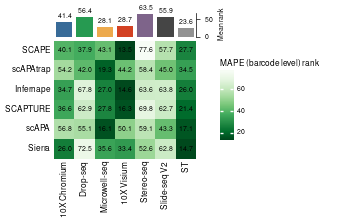

In [9]:
plt.rcParams["xtick.direction"] = "out"
plt.rcParams["ytick.direction"] = "out"
plt.rcParams["xtick.bottom"] = False
plt.rcParams["xtick.minor.bottom"] = True
plt.rcParams["ytick.left"] = False

h = ma.Heatmap(
    quantification_performance_mape_rank_df,
    cmap="Greens_r",
    label="MAPE (barcode level) rank",
    width=36*mm,
    height=30*mm,
)
h.add_layer(mp.TextMesh(np.around(quantification_performance_mape_rank_df.to_numpy(),1), color="black", fontsize=5))
h.add_top(mp.Numbers(
    quantification_performance_mape_rank_df.mean().round(1),
    color=palette, 
    label="Mean rank",
    show_value=True,
    props={"fontsize": 5}
    ),
    size=6*mm,
    pad=1*mm,
    name="top"
)


# h.add_left(mp.Chunk(["" for i in range(7)], palette, ),pad=0.05)
h.add_left(mp.Labels(tool_order, rotation=0, fontsize=6), size=7*mm, pad=1*mm)
# h.add_bottom(mp.Chunk(["" for i in range(7)], palette),pad=0.05)
h.add_bottom(mp.Labels(protocol_order, rotation=90, fontsize=6), size=10*mm, pad=1*mm)
h.add_legends("right", align_legends="top",pad=2.5*mm)
h.render()

h.get_ax("top").yaxis.set_label_position("right")
h.get_ax("top").yaxis.set_ticks_position("right")
h.get_ax("top").tick_params(axis='y', which='minor', right=False)
h.get_ax("top").spines["right"].set_visible(True)
h.get_ax("top").spines["left"].set_visible(False)

plt.savefig('/root/apabenchmark/plot/fig6/mape_rank.pdf', bbox_inches='tight', dpi=300)
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.bottom"] = True
plt.rcParams["ytick.left"] = True
plt.rcParams["xtick.minor.bottom"] = False

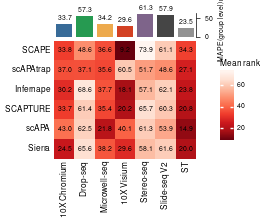

In [10]:
plt.rcParams["xtick.direction"] = "out"
plt.rcParams["ytick.direction"] = "out"
plt.rcParams["xtick.bottom"] = False
plt.rcParams["xtick.minor.bottom"] = True
plt.rcParams["ytick.left"] = False

h = ma.Heatmap(
    quantification_performance_mape_ct_rank_df,
    cmap="Reds_r",
    label="Mean rank",
    width=36*mm,
    height=30*mm,
)
h.add_layer(mp.TextMesh(np.around(quantification_performance_mape_ct_rank_df.to_numpy(),1), color="black", fontsize=5))
h.add_top(mp.Numbers(
    quantification_performance_mape_ct_rank_df.mean().round(1),
    color=palette, 
    label="MAPE (group level) rank",
    show_value=True,
    props={"fontsize": 5}
    ),
    size=6*mm,
    pad=1*mm,
    name="top"
)


# h.add_left(mp.Chunk(["" for i in range(7)], palette, ),pad=0.05)
h.add_left(mp.Labels(tool_order, rotation=0, fontsize=6), size=7*mm, pad=1*mm)
# h.add_bottom(mp.Chunk(["" for i in range(7)], palette),pad=0.05)
h.add_bottom(mp.Labels(protocol_order, rotation=90, fontsize=6), size=10*mm, pad=1*mm)
h.add_legends("right", align_legends="top",pad=2.5*mm)
h.render()

h.get_ax("top").yaxis.set_label_position("right")
h.get_ax("top").yaxis.set_ticks_position("right")
h.get_ax("top").tick_params(axis='y', which='minor', right=False)
h.get_ax("top").spines["right"].set_visible(True)
h.get_ax("top").spines["left"].set_visible(False)

plt.savefig('/root/apabenchmark/plot/fig6/mape_ct_rank.pdf', bbox_inches='tight', dpi=300)
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.bottom"] = True
plt.rcParams["ytick.left"] = True
plt.rcParams["xtick.minor.bottom"] = False

In [11]:
te_match_jaccard_df = pd.read_csv("/root/apabenchmark/data/performance/te_jaccard.tsv", sep="\t")
pas_match_jaccard_df = pd.read_csv("/root/apabenchmark/data/performance/pas_jaccard.tsv", sep="\t")

te_match_jaccard_df["tool_1"] = te_match_jaccard_df["tool_1"].map(tool_map)
te_match_jaccard_df["tool_2"] = te_match_jaccard_df["tool_2"].map(tool_map)
te_match_jaccard_df["protocol_1"] = te_match_jaccard_df["protocol_1"].map(protocol_map)
te_match_jaccard_df["protocol_2"] = te_match_jaccard_df["protocol_2"].map(protocol_map)
te_match_jaccard_df["tool_1"] = pd.Categorical(te_match_jaccard_df["tool_1"], categories=tool_order)
te_match_jaccard_df["tool_2"] = pd.Categorical(te_match_jaccard_df["tool_2"], categories=tool_order)
te_match_jaccard_df["protocol_1"] = pd.Categorical(te_match_jaccard_df["protocol_1"], categories=protocol_order)
te_match_jaccard_df["protocol_2"] = pd.Categorical(te_match_jaccard_df["protocol_2"], categories=protocol_order)
te_match_jaccard_df = te_match_jaccard_df.sort_values(["tool_1", "tool_2", "protocol_1", "protocol_2"])

pas_match_jaccard_df["tool_1"] = pas_match_jaccard_df["tool_1"].map(tool_map)
pas_match_jaccard_df["tool_2"] = pas_match_jaccard_df["tool_2"].map(tool_map)
pas_match_jaccard_df["protocol_1"] = pas_match_jaccard_df["protocol_1"].map(protocol_map)
pas_match_jaccard_df["protocol_2"] = pas_match_jaccard_df["protocol_2"].map(protocol_map)
pas_match_jaccard_df["tool_1"] = pd.Categorical(pas_match_jaccard_df["tool_1"], categories=tool_order)
pas_match_jaccard_df["tool_2"] = pd.Categorical(pas_match_jaccard_df["tool_2"], categories=tool_order)
pas_match_jaccard_df["protocol_1"] = pd.Categorical(pas_match_jaccard_df["protocol_1"], categories=protocol_order)
pas_match_jaccard_df["protocol_2"] = pd.Categorical(pas_match_jaccard_df["protocol_2"], categories=protocol_order)
pas_match_jaccard_df = pas_match_jaccard_df.sort_values(["tool_1", "tool_2", "protocol_1", "protocol_2"])


In [12]:
de_performance_df = pd.read_csv('/root/apabenchmark/data/performance/de_apa_performance.tsv', sep='\t')
de_performance_df["protocol"] = de_performance_df["protocol"].map(protocol_map)
de_performance_df["tool"] = de_performance_df["tool"].map(tool_map)
de_performance_df["protocol"] = pd.Categorical(de_performance_df["protocol"], categories=protocol_order)
de_performance_df["tool"] = pd.Categorical(de_performance_df["tool"], categories=tool_order)
de_performance_df = de_performance_df[de_performance_df["filter_type_1"].str.endswith("0.05")]

filter_type_2_list = [
    "PDUI_0.2",
    "PPUI_0.2",
    "RWUI_0.1",
    "DWUI_0.1",
    "MPRO_0.2",
    "dexseq_log2fc_0.5"
]
de_performance_filtered_df = de_performance_df[de_performance_df["filter_type_2"].isin(filter_type_2_list)]

In [13]:
de_performance_max_df = (de_performance_filtered_df
                         .groupby(['tool', 'sample'])
                         .apply(lambda x: x.sort_values('f1', ascending=False).head(1))
                         .reset_index(drop=True)
                        )
de_performance_max_df["raw_sample"] = de_performance_max_df["sample"].str.split("_", expand=True).iloc[:,0:4].apply(lambda x: "_".join(x), axis=1)
de_performance_max_df["pas"] = de_performance_max_df["sample"].str.split("_", expand=True).iloc[:,4]

In [14]:
de_performance_max_df["f1_rank"] = de_performance_max_df.groupby(["tool","pas"])["f1"].rank(ascending=False, method='first')
de_performance_max_df["precision_rank"] = de_performance_max_df.groupby(["tool","pas"])["precision"].rank(ascending=False, method='first')
de_performance_max_df["recall_rank"] = de_performance_max_df.groupby(["tool","pas"])["recall"].rank(ascending=False, method='first')

de_performance_max_rank_df = de_performance_max_df.groupby(["tool", "protocol"]).mean().reset_index()

/tmp/ipykernel_850126/3033151730.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  de_performance_max_rank_df = de_performance_max_df.groupby(["tool", "protocol"]).mean().reset_index()


In [15]:
de_performance_max_f1_rank_df = de_performance_max_rank_df.pivot(index="tool", columns="protocol", values="f1_rank")
de_performance_max_precision_rank_df = de_performance_max_rank_df.pivot(index="tool", columns="protocol", values="precision_rank")

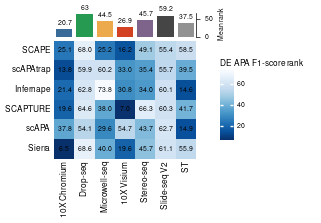

In [16]:
plt.rcParams["xtick.direction"] = "out"
plt.rcParams["ytick.direction"] = "out"
plt.rcParams["xtick.bottom"] = False
plt.rcParams["xtick.minor.bottom"] = True
plt.rcParams["ytick.left"] = False

cmap = ["Reds", "Blues", "Greens"]
h = ma.Heatmap(
    de_performance_max_f1_rank_df,
    cmap="Blues_r",
    label="DE APA F1-score rank",
    width=36*mm,
    height=30*mm,
)
h.add_layer(mp.TextMesh(np.around(de_performance_max_f1_rank_df.to_numpy(),1), color="black", fontsize=5))
h.add_top(mp.Numbers(
    de_performance_max_f1_rank_df.mean().round(1),
    color=palette, 
    label="Mean rank",
    show_value=True,
    props={"fontsize": 5}
    ),
    size=6*mm,
    pad=1*mm,
    name="top"
)


# h.add_left(mp.Chunk(["" for i in range(7)], palette, ),pad=0.05)
h.add_left(mp.Labels(tool_order, rotation=0, fontsize=6), size=7*mm, pad=1*mm)
# h.add_bottom(mp.Chunk(["" for i in range(7)], palette),pad=0.05)
h.add_bottom(mp.Labels(protocol_order, rotation=90, fontsize=6), size=10*mm, pad=1*mm)
h.add_legends("right", align_legends="top",pad=2.5*mm)
h.render()

h.get_ax("top").yaxis.set_label_position("right")
h.get_ax("top").yaxis.set_ticks_position("right")
h.get_ax("top").tick_params(axis='y', which='minor', right=False)
h.get_ax("top").spines["right"].set_visible(True)
h.get_ax("top").spines["left"].set_visible(False)

plt.savefig('/root/apabenchmark/plot/fig6/de_apa_f1_rank.pdf', bbox_inches='tight', dpi=300)
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.bottom"] = True
plt.rcParams["ytick.left"] = True
plt.rcParams["xtick.minor.bottom"] = False

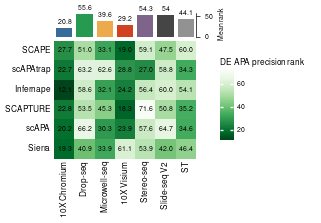

In [17]:
plt.rcParams["xtick.direction"] = "out"
plt.rcParams["ytick.direction"] = "out"
plt.rcParams["xtick.bottom"] = False
plt.rcParams["xtick.minor.bottom"] = True
plt.rcParams["ytick.left"] = False

h = ma.Heatmap(
    de_performance_max_precision_rank_df,
    cmap="Greens_r",
    label="DE APA precision rank",
    width=36*mm,
    height=30*mm,
)
h.add_layer(mp.TextMesh(np.around(de_performance_max_precision_rank_df.to_numpy(),1), color="black", fontsize=5))
h.add_top(mp.Numbers(
    de_performance_max_precision_rank_df.mean().round(1),
    color=palette, 
    label="Mean rank",
    show_value=True,
    props={"fontsize": 5}
    ),
    size=6*mm,
    pad=1*mm,
    name="top"
)


# h.add_left(mp.Chunk(["" for i in range(7)], palette, ),pad=0.05)
h.add_left(mp.Labels(tool_order, rotation=0, fontsize=6), size=7*mm, pad=1*mm)
# h.add_bottom(mp.Chunk(["" for i in range(7)], palette),pad=0.05)
h.add_bottom(mp.Labels(protocol_order, rotation=90, fontsize=6), size=10*mm, pad=1*mm)
h.add_legends("right", align_legends="top",pad=2.5*mm)
h.render()

h.get_ax("top").yaxis.set_label_position("right")
h.get_ax("top").yaxis.set_ticks_position("right")
h.get_ax("top").tick_params(axis='y', which='minor', right=False)
h.get_ax("top").spines["right"].set_visible(True)
h.get_ax("top").spines["left"].set_visible(False)

plt.savefig('/root/apabenchmark/plot/fig6/de_apa_precision_rank.pdf', bbox_inches='tight', dpi=300)
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.bottom"] = True
plt.rcParams["ytick.left"] = True
plt.rcParams["xtick.minor.bottom"] = False